In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools


dataset = pd.read_csv('../breast_cancer.csv',sep= ',')
dataset = dataset.drop('Unnamed: 32', axis=1)

M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]


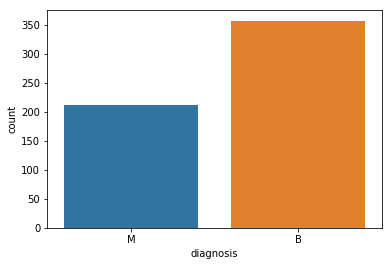

In [5]:
count_plot = sns.countplot(x='diagnosis', data=data);
count_plot_fig = count_plot.get_figure()
count_plot_fig.savefig('diagnosis_count.jpg')

In [7]:
corr = data.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


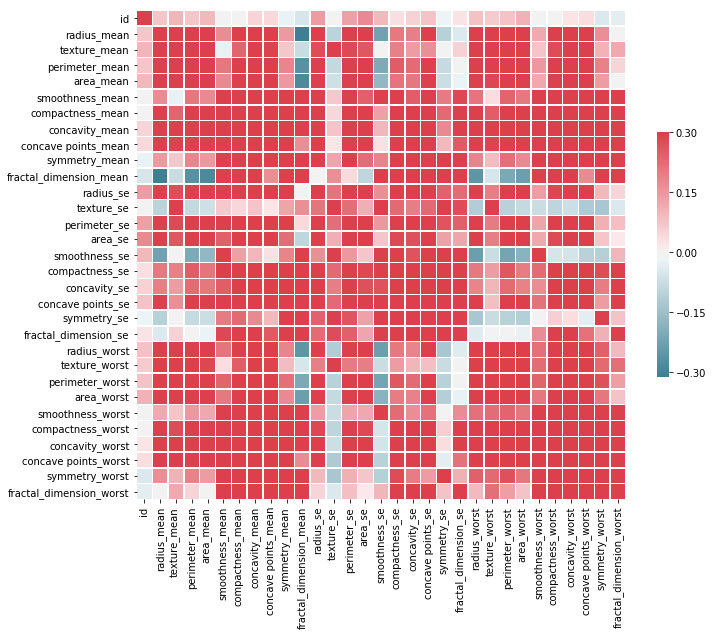

In [22]:

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr_matrix = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr_matrix_fig = corr_matrix.get_figure()
corr_matrix_fig.savefig('Correlation_matrix.jpg',bbox_inches='tight')

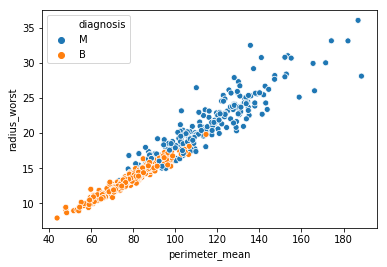

In [21]:
pm_v_rw = sns.scatterplot(x='perimeter_mean',y='radius_worst',data = data, hue='diagnosis')
pm_v_rw_fig = pm_v_rw.get_figure()
pm_v_rw_fig.savefig('perimeter_mean_vs_radius_worst.jpg')

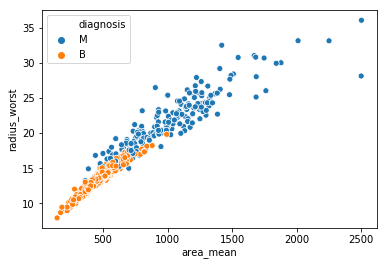

In [23]:
a_v_rw = sns.scatterplot(x='area_mean',y='radius_worst',data = data, hue='diagnosis')
a_v_rw_fig = a_v_rw.get_figure()
a_v_rw_fig.savefig('area_mean_vs_radius_worst.jpg')

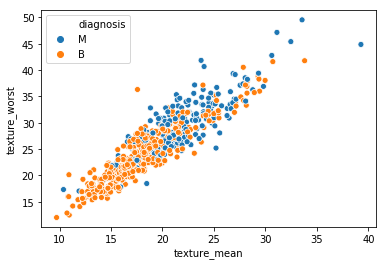

In [24]:
tm_v_tw = sns.scatterplot(x='texture_mean',y='texture_worst',data = data, hue='diagnosis')
tm_v_tw_fig = tm_v_tw.get_figure()
tm_v_tw_fig.savefig('texture_mean_vs_texture_worst.jpg')

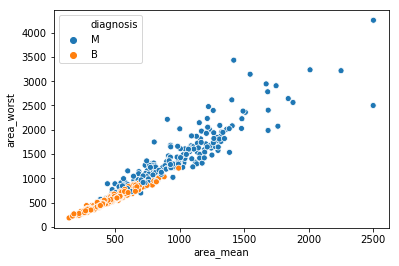

In [25]:
a_v_aw = sns.scatterplot(x='area_mean',y='area_worst',data = data, hue='diagnosis')
a_v_aw_fig = a_v_aw.get_figure()
a_v_aw_fig.savefig('area_mean_vs_area_worst.jpg')

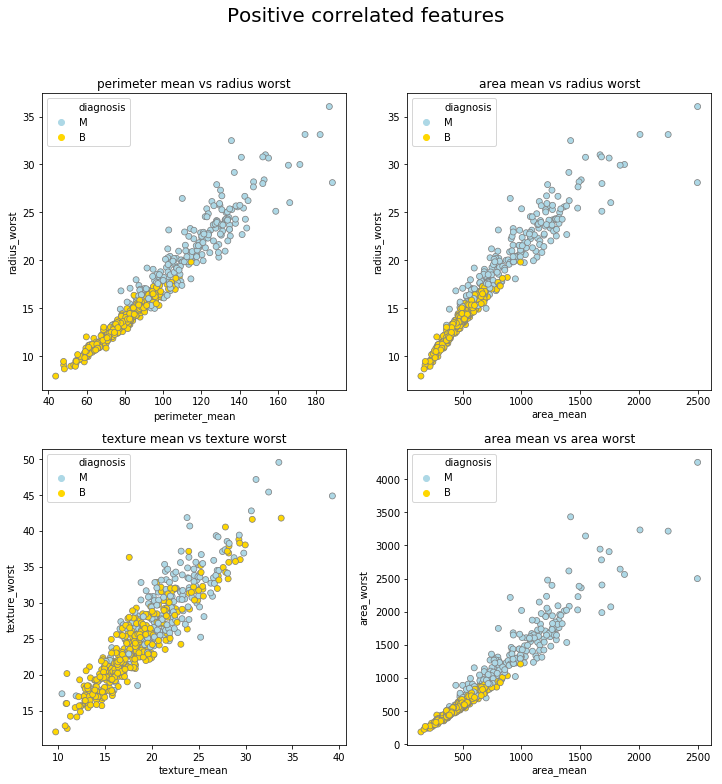

In [29]:
palette ={'M' : 'lightblue', 'B' : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)
plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_mean'], y = data['area_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('area mean vs area worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('positive_correlated_features.jpg')
plt.show()

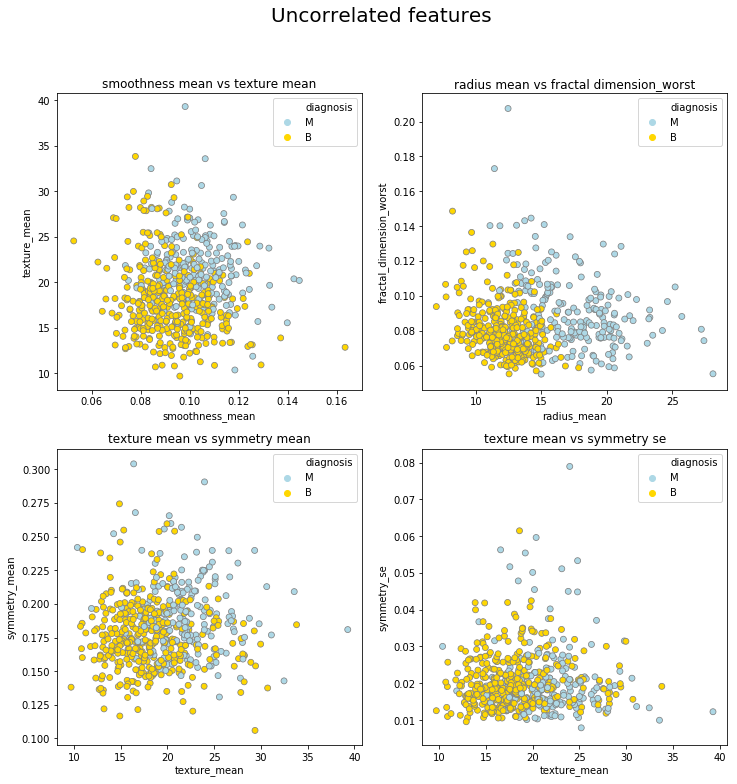

In [30]:
# Uncorrelated Features 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)
plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('uncorrelated_features.jpg')
plt.show()

In [88]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import KernelPCA

In [14]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g",
             label = "Cross-validation score")
    plt.legend(loc = "best")
    return plt

In [11]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.subplot(2,1,1)
    #Train set boundary
    X_set, y_set = x_train_reduced, y_train
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Train Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    
    
    plt.subplot(2,1,2)
    #Test set boundary
    X_set, y_set = x_test_reduced, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA (Test Set)' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.tight_layout()

In [27]:
X = dataset.values[:,1:] 
y = dataset.values[:,0]
u=[]

print ("Dataset Length: ", len(dataset))
print ("Dataset Shape:: ", dataset.shape)

for i in y:
	if(i=='M'):	
		u.append(1)
	else:	
		u.append(0)
y=np.array(u)
#y = data.diagnosis
#y = y.map({'M':1,'B':0})
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23) 

print(y)

Dataset Length:  569
Dataset Shape::  (569, 32)
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [24]:
BoundaryLine('linear', GaussianNB(), "Gaussian NB")

ValueError: could not convert string to float: 'M'

Dataset Length:  569
Dataset Shape::  (569, 31)
(569,)
[[74  1]
 [ 4 35]]
Naive Bayes  0.956140350877193
[[75  0]
 [39  0]]
SVC  0.6578947368421053
[[74  1]
 [ 3 36]]
Logistic regression  0.9649122807017544
(569,)


c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[[75  0]
 [ 1 38]]
Random forest entropy  0.9912280701754386
[[74  1]
 [ 1 38]]
Random forest gini  0.9824561403508771
[[75  0]
 [ 1 38]]
Extra tree entropy  0.9912280701754386
[[75  0]
 [ 2 37]]
Extra tree gini  0.9824561403508771


c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:170: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", input_dim=30, kernel_initializer="uniform")`
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:171: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:172: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:173: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:174: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", ker

Train on 455 samples, validate on 114 samples
Epoch 1/512
455/455 [==============================] - 1s 1ms/step - loss: 0.6928 - acc: 0.6747 - val_loss: 0.6921 - val_acc: 0.6579
Epoch 2/512
455/455 [==============================] - 0s 74us/step - loss: 0.6921 - acc: 0.6198 - val_loss: 0.6912 - val_acc: 0.6579
Epoch 3/512
455/455 [==============================] - 0s 79us/step - loss: 0.6914 - acc: 0.6198 - val_loss: 0.6903 - val_acc: 0.6579
Epoch 4/512
455/455 [==============================] - 0s 79us/step - loss: 0.6907 - acc: 0.6198 - val_loss: 0.6894 - val_acc: 0.6579
Epoch 5/512
455/455 [==============================] - 0s 79us/step - loss: 0.6901 - acc: 0.6198 - val_loss: 0.6885 - val_acc: 0.6579
Epoch 6/512
455/455 [==============================] - 0s 77us/step - loss: 0.6894 - acc: 0.6198 - val_loss: 0.6877 - val_acc: 0.6579
Epoch 7/512
455/455 [==============================] - 0s 79us/step - loss: 0.6888 - acc: 0.6198 - val_loss: 0.6868 - val_acc: 0.6579
Epoch 8/512
455/4

455/455 [==============================] - 0s 74us/step - loss: 0.6702 - acc: 0.6198 - val_loss: 0.6604 - val_acc: 0.6579
Epoch 62/512
455/455 [==============================] - 0s 74us/step - loss: 0.6700 - acc: 0.6198 - val_loss: 0.6601 - val_acc: 0.6579
Epoch 63/512
455/455 [==============================] - 0s 92us/step - loss: 0.6699 - acc: 0.6198 - val_loss: 0.6599 - val_acc: 0.6579
Epoch 64/512
455/455 [==============================] - 0s 81us/step - loss: 0.6697 - acc: 0.6198 - val_loss: 0.6596 - val_acc: 0.6579
Epoch 65/512
455/455 [==============================] - 0s 79us/step - loss: 0.6696 - acc: 0.6198 - val_loss: 0.6594 - val_acc: 0.6579
Epoch 66/512
455/455 [==============================] - 0s 83us/step - loss: 0.6694 - acc: 0.6198 - val_loss: 0.6591 - val_acc: 0.6579
Epoch 67/512
455/455 [==============================] - 0s 77us/step - loss: 0.6692 - acc: 0.6198 - val_loss: 0.6589 - val_acc: 0.6579
Epoch 68/512
455/455 [==============================] - 0s 85us/step

455/455 [==============================] - 0s 74us/step - loss: 0.6637 - acc: 0.6198 - val_loss: 0.6494 - val_acc: 0.6579
Epoch 122/512
455/455 [==============================] - 0s 72us/step - loss: 0.6636 - acc: 0.6198 - val_loss: 0.6492 - val_acc: 0.6579
Epoch 123/512
455/455 [==============================] - 0s 81us/step - loss: 0.6635 - acc: 0.6198 - val_loss: 0.6491 - val_acc: 0.6579
Epoch 124/512
455/455 [==============================] - 0s 81us/step - loss: 0.6634 - acc: 0.6198 - val_loss: 0.6490 - val_acc: 0.6579
Epoch 125/512
455/455 [==============================] - 0s 75us/step - loss: 0.6634 - acc: 0.6198 - val_loss: 0.6488 - val_acc: 0.6579
Epoch 126/512
455/455 [==============================] - 0s 74us/step - loss: 0.6633 - acc: 0.6198 - val_loss: 0.6487 - val_acc: 0.6579
Epoch 127/512
455/455 [==============================] - 0s 79us/step - loss: 0.6632 - acc: 0.6198 - val_loss: 0.6486 - val_acc: 0.6579
Epoch 128/512
455/455 [==============================] - 0s 75

455/455 [==============================] - 0s 72us/step - loss: 0.6573 - acc: 0.6198 - val_loss: 0.6408 - val_acc: 0.6579
Epoch 182/512
455/455 [==============================] - 0s 77us/step - loss: 0.6570 - acc: 0.6198 - val_loss: 0.6406 - val_acc: 0.6579
Epoch 183/512
455/455 [==============================] - 0s 81us/step - loss: 0.6571 - acc: 0.6198 - val_loss: 0.6404 - val_acc: 0.6579
Epoch 184/512
455/455 [==============================] - 0s 77us/step - loss: 0.6569 - acc: 0.6198 - val_loss: 0.6402 - val_acc: 0.6579
Epoch 185/512
455/455 [==============================] - 0s 72us/step - loss: 0.6563 - acc: 0.6198 - val_loss: 0.6399 - val_acc: 0.6579
Epoch 186/512
455/455 [==============================] - 0s 77us/step - loss: 0.6565 - acc: 0.6198 - val_loss: 0.6397 - val_acc: 0.6579
Epoch 187/512
455/455 [==============================] - 0s 70us/step - loss: 0.6561 - acc: 0.6198 - val_loss: 0.6395 - val_acc: 0.6579
Epoch 188/512
455/455 [==============================] - 0s 72

455/455 [==============================] - 0s 79us/step - loss: 0.6203 - acc: 0.6308 - val_loss: 0.6027 - val_acc: 0.6667
Epoch 242/512
455/455 [==============================] - 0s 85us/step - loss: 0.6171 - acc: 0.6440 - val_loss: 0.6009 - val_acc: 0.6667
Epoch 243/512
455/455 [==============================] - 0s 85us/step - loss: 0.6166 - acc: 0.6440 - val_loss: 0.5991 - val_acc: 0.6667
Epoch 244/512
455/455 [==============================] - 0s 88us/step - loss: 0.6133 - acc: 0.6418 - val_loss: 0.5971 - val_acc: 0.6842
Epoch 245/512
455/455 [==============================] - 0s 92us/step - loss: 0.6125 - acc: 0.6484 - val_loss: 0.5952 - val_acc: 0.6842
Epoch 246/512
455/455 [==============================] - 0s 88us/step - loss: 0.6111 - acc: 0.6418 - val_loss: 0.5931 - val_acc: 0.7018
Epoch 247/512
455/455 [==============================] - 0s 88us/step - loss: 0.6062 - acc: 0.6593 - val_loss: 0.5909 - val_acc: 0.7105
Epoch 248/512
455/455 [==============================] - 0s 96

455/455 [==============================] - 0s 72us/step - loss: 0.3901 - acc: 0.9253 - val_loss: 0.3816 - val_acc: 0.9474
Epoch 302/512
455/455 [==============================] - 0s 72us/step - loss: 0.3842 - acc: 0.9319 - val_loss: 0.3782 - val_acc: 0.9474
Epoch 303/512
455/455 [==============================] - 0s 74us/step - loss: 0.3894 - acc: 0.9297 - val_loss: 0.3749 - val_acc: 0.9474
Epoch 304/512
455/455 [==============================] - 0s 70us/step - loss: 0.3843 - acc: 0.9319 - val_loss: 0.3717 - val_acc: 0.9474
Epoch 305/512
455/455 [==============================] - 0s 72us/step - loss: 0.3761 - acc: 0.9363 - val_loss: 0.3684 - val_acc: 0.9474
Epoch 306/512
455/455 [==============================] - 0s 79us/step - loss: 0.3751 - acc: 0.9363 - val_loss: 0.3652 - val_acc: 0.9474
Epoch 307/512
455/455 [==============================] - 0s 77us/step - loss: 0.3685 - acc: 0.9363 - val_loss: 0.3621 - val_acc: 0.9474
Epoch 308/512
455/455 [==============================] - 0s 72

455/455 [==============================] - 0s 96us/step - loss: 0.2469 - acc: 0.9538 - val_loss: 0.2377 - val_acc: 0.9561
Epoch 362/512
455/455 [==============================] - 0s 105us/step - loss: 0.2440 - acc: 0.9516 - val_loss: 0.2359 - val_acc: 0.9561
Epoch 363/512
455/455 [==============================] - 0s 88us/step - loss: 0.2432 - acc: 0.9560 - val_loss: 0.2341 - val_acc: 0.9561
Epoch 364/512
455/455 [==============================] - 0s 90us/step - loss: 0.2385 - acc: 0.9560 - val_loss: 0.2323 - val_acc: 0.9561
Epoch 365/512
455/455 [==============================] - 0s 90us/step - loss: 0.2396 - acc: 0.9582 - val_loss: 0.2306 - val_acc: 0.9561
Epoch 366/512
455/455 [==============================] - 0s 85us/step - loss: 0.2405 - acc: 0.9560 - val_loss: 0.2289 - val_acc: 0.9561
Epoch 367/512
455/455 [==============================] - 0s 94us/step - loss: 0.2352 - acc: 0.9582 - val_loss: 0.2271 - val_acc: 0.9561
Epoch 368/512
455/455 [==============================] - 0s 9

455/455 [==============================] - 0s 72us/step - loss: 0.1610 - acc: 0.9626 - val_loss: 0.1489 - val_acc: 0.9825
Epoch 422/512
455/455 [==============================] - 0s 74us/step - loss: 0.1582 - acc: 0.9714 - val_loss: 0.1477 - val_acc: 0.9825
Epoch 423/512
455/455 [==============================] - 0s 77us/step - loss: 0.1552 - acc: 0.9692 - val_loss: 0.1465 - val_acc: 0.9825
Epoch 424/512
455/455 [==============================] - 0s 77us/step - loss: 0.1581 - acc: 0.9648 - val_loss: 0.1454 - val_acc: 0.9825
Epoch 425/512
455/455 [==============================] - 0s 72us/step - loss: 0.1592 - acc: 0.9692 - val_loss: 0.1443 - val_acc: 0.9825
Epoch 426/512
455/455 [==============================] - 0s 79us/step - loss: 0.1546 - acc: 0.9692 - val_loss: 0.1432 - val_acc: 0.9825
Epoch 427/512
455/455 [==============================] - 0s 70us/step - loss: 0.1507 - acc: 0.9714 - val_loss: 0.1421 - val_acc: 0.9825
Epoch 428/512
455/455 [==============================] - 0s 77

455/455 [==============================] - 0s 77us/step - loss: 0.1089 - acc: 0.9802 - val_loss: 0.0978 - val_acc: 0.9825
Epoch 482/512
455/455 [==============================] - 0s 74us/step - loss: 0.1133 - acc: 0.9714 - val_loss: 0.0972 - val_acc: 0.9825
Epoch 483/512
455/455 [==============================] - 0s 74us/step - loss: 0.1077 - acc: 0.9780 - val_loss: 0.0966 - val_acc: 0.9825
Epoch 484/512
455/455 [==============================] - 0s 70us/step - loss: 0.1078 - acc: 0.9780 - val_loss: 0.0960 - val_acc: 0.9825
Epoch 485/512
455/455 [==============================] - 0s 72us/step - loss: 0.1088 - acc: 0.9758 - val_loss: 0.0955 - val_acc: 0.9825
Epoch 486/512
455/455 [==============================] - 0s 72us/step - loss: 0.1097 - acc: 0.9736 - val_loss: 0.0949 - val_acc: 0.9825
Epoch 487/512
455/455 [==============================] - 0s 72us/step - loss: 0.1073 - acc: 0.9758 - val_loss: 0.0944 - val_acc: 0.9825
Epoch 488/512
455/455 [==============================] - 0s 77

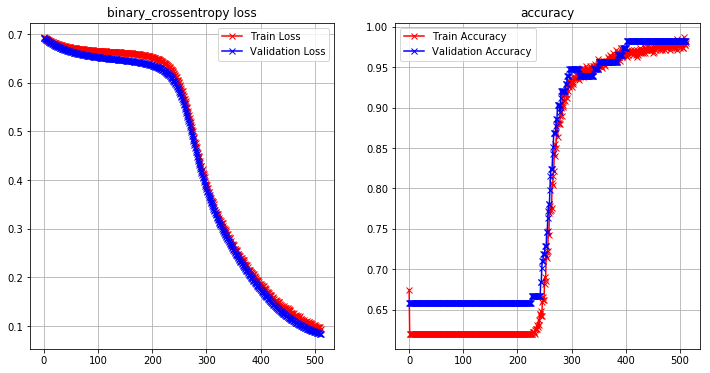

In [157]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.layers import Flatten
import matplotlib.pyplot as plt
from keras.optimizers import Adam, SGD, RMSprop

def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history['val_loss'],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('binary_crossentropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True); p = ax.get_figure(); p.savefig('annplot.jpg')

dataset= pd.read_csv('../breast_cancer.csv',sep= ',')
del dataset['Unnamed: 32']
del dataset['id']


X = dataset.values[:,1:]
y = dataset.values[:,0]
u=[]

print ("Dataset Length: ", len(dataset))
print ("Dataset Shape:: ", dataset.shape)

for i in y:
	if(i=='M'):
		u.append(1)
	else:
		u.append(0)
y=np.array(u)
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23)

model = GaussianNB()
model.fit(X_train, y_train)
y_prednb = model.predict(X_test)
print(confusion_matrix(y_test,y_prednb))
#print(classification_report(y_test, y_pred))
print("Naive Bayes ",accuracy_score(y_test,y_prednb))
svc = SVC(kernel = 'llinear',C=1, gamma=10, probability = True)
y_predsvm = svc.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test,y_predsvm ))
#print(classification_report(y_test, y_pred))
print("SVC ",accuracy_score(y_test,y_predsvm ))


clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_predlr = clf.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test,y_predlr))
#print(classification_report(y_test, y_pred))
print("Logistic regression ",accuracy_score(y_test,y_predlr))


cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
dataset=dataset.drop(cols, axis=1)

cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
dataset=dataset.drop(cols, axis=1)

cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']
dataset=dataset.drop(cols, axis=1)
X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']
u2=[]
for i in y:
	if(i=='M'):
		u2.append(1)
	else:
		u2.append(0)
y=np.array(u2)
print(np.shape(y))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23)
rf=RandomForestClassifier(random_state=23,n_estimators = 200, max_features=6,criterion = 'entropy')
#rf=RandomForestClassifier(n_estimators=200,max_features=6,criterion="entropy")
rf.fit(X_train,y_train)
y_predrfe= rf.predict(X_test)
print(confusion_matrix(y_test,y_predrfe))
#print(classification_report(y_test, y_pred2))
print("Random forest entropy ",accuracy_score(y_test,y_predrfe))

rf=RandomForestClassifier(random_state=23,n_estimators=200,max_features=6,criterion="gini")
rf.fit(X_train,y_train)
y_predrfg = rf.predict(X_test)
print(confusion_matrix(y_test, y_predrfg))
#print(classification_report(y_test, y_pred))
print("Random forest gini ",accuracy_score(y_test,y_predrfg))

rf=ExtraTreesClassifier(random_state=23,n_estimators=200,max_features=6,criterion="entropy")
rf.fit(X_train,y_train)
y_predete = rf.predict(X_test)
print(confusion_matrix(y_test,y_predete))
#print(classification_report(y_test, y_pred))
print("Extra tree entropy ",accuracy_score(y_test,y_predete))

rf=ExtraTreesClassifier(random_state=23,n_estimators=200,max_features=6,criterion="gini")
rf.fit(X_train,y_train)
y_predetg = rf.predict(X_test)
print(confusion_matrix(y_test,y_predetg))
#print(classification_report(y_test, y_pred))
print("Extra tree gini ",accuracy_score(y_test,y_predetg))

#svc=SVC(kernel = 'linear', random_state = 0)


df = pd.read_csv('../breast_cancer.csv')
df = df.drop('Unnamed: 32', axis=1)

X = df.iloc[:, 2:].values
y = df['diagnosis'].values

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

X_train, X_test, y_train, y_te = train_test_split(X, y, test_size = 0.2, random_state = 23)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model = Sequential()
model.add(Dense(16, init='uniform', activation='relu', input_dim=30))
model.add(Dropout(p=0.1))
model.add(Dense(16, init='uniform', activation='relu'))
model.add(Dropout(p=0.1))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=100, nb_epoch=512, validation_data = (X_test,y_te))
plot_loss_accuracy(history)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_predann = []
for i in range(len(y_pred)):
        if y[i] == True:
                y_predann.append(1)
        else:
                y_predann.append(0)

print(confusion_matrix(y_te, y_pred))
a = accuracy_score(y_te, y_pred)
print(a)


In [140]:
df = pd.DataFrame()
# y_predrfg+y_predrfe+y_predete+y_predetg+y_predsvm+y_predlr+y_prednb+y_predann

In [141]:
dataset= pd.read_csv('../breast_cancer.csv',sep= ',')
del dataset['Unnamed: 32']
del dataset['id']


X = dataset.values[:,1:]
y = dataset.values[:,0]
u=[]

print ("Dataset Length: ", len(dataset))
print ("Dataset Shape:: ", dataset.shape)

for i in y:
	if(i=='M'):
		u.append(1)
	else:
		u.append(0)
y=np.array(u)
print(np.shape(y))

Dataset Length:  569
Dataset Shape::  (569, 31)
(569,)


In [142]:

df['col1'] = y_predrfg
df['col2'] = y_predrfe
df['col3'] = y_predete
df['col4'] = y_predetg
df['col5'] = y_predsvm
df['col6'] = y_predlr
df['col7'] = y_prednb
df['col8'] = y_predann


In [143]:
df.shape

(114, 8)

In [144]:
y_test.shape

(114,)

In [152]:
df['target'] = y_test

In [151]:
df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,target
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,1,0
2,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,1,0
4,1,1,1,1,1,1,1,1,1


In [147]:
X= df.iloc[:,:7]
X.head()

,col1,col2,col3,col4,col5,col6,col7
0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1


In [149]:
y = df.target


In [155]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8,random_state=23)

c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(22, 2)
(92, 2)
(114, 2)


c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


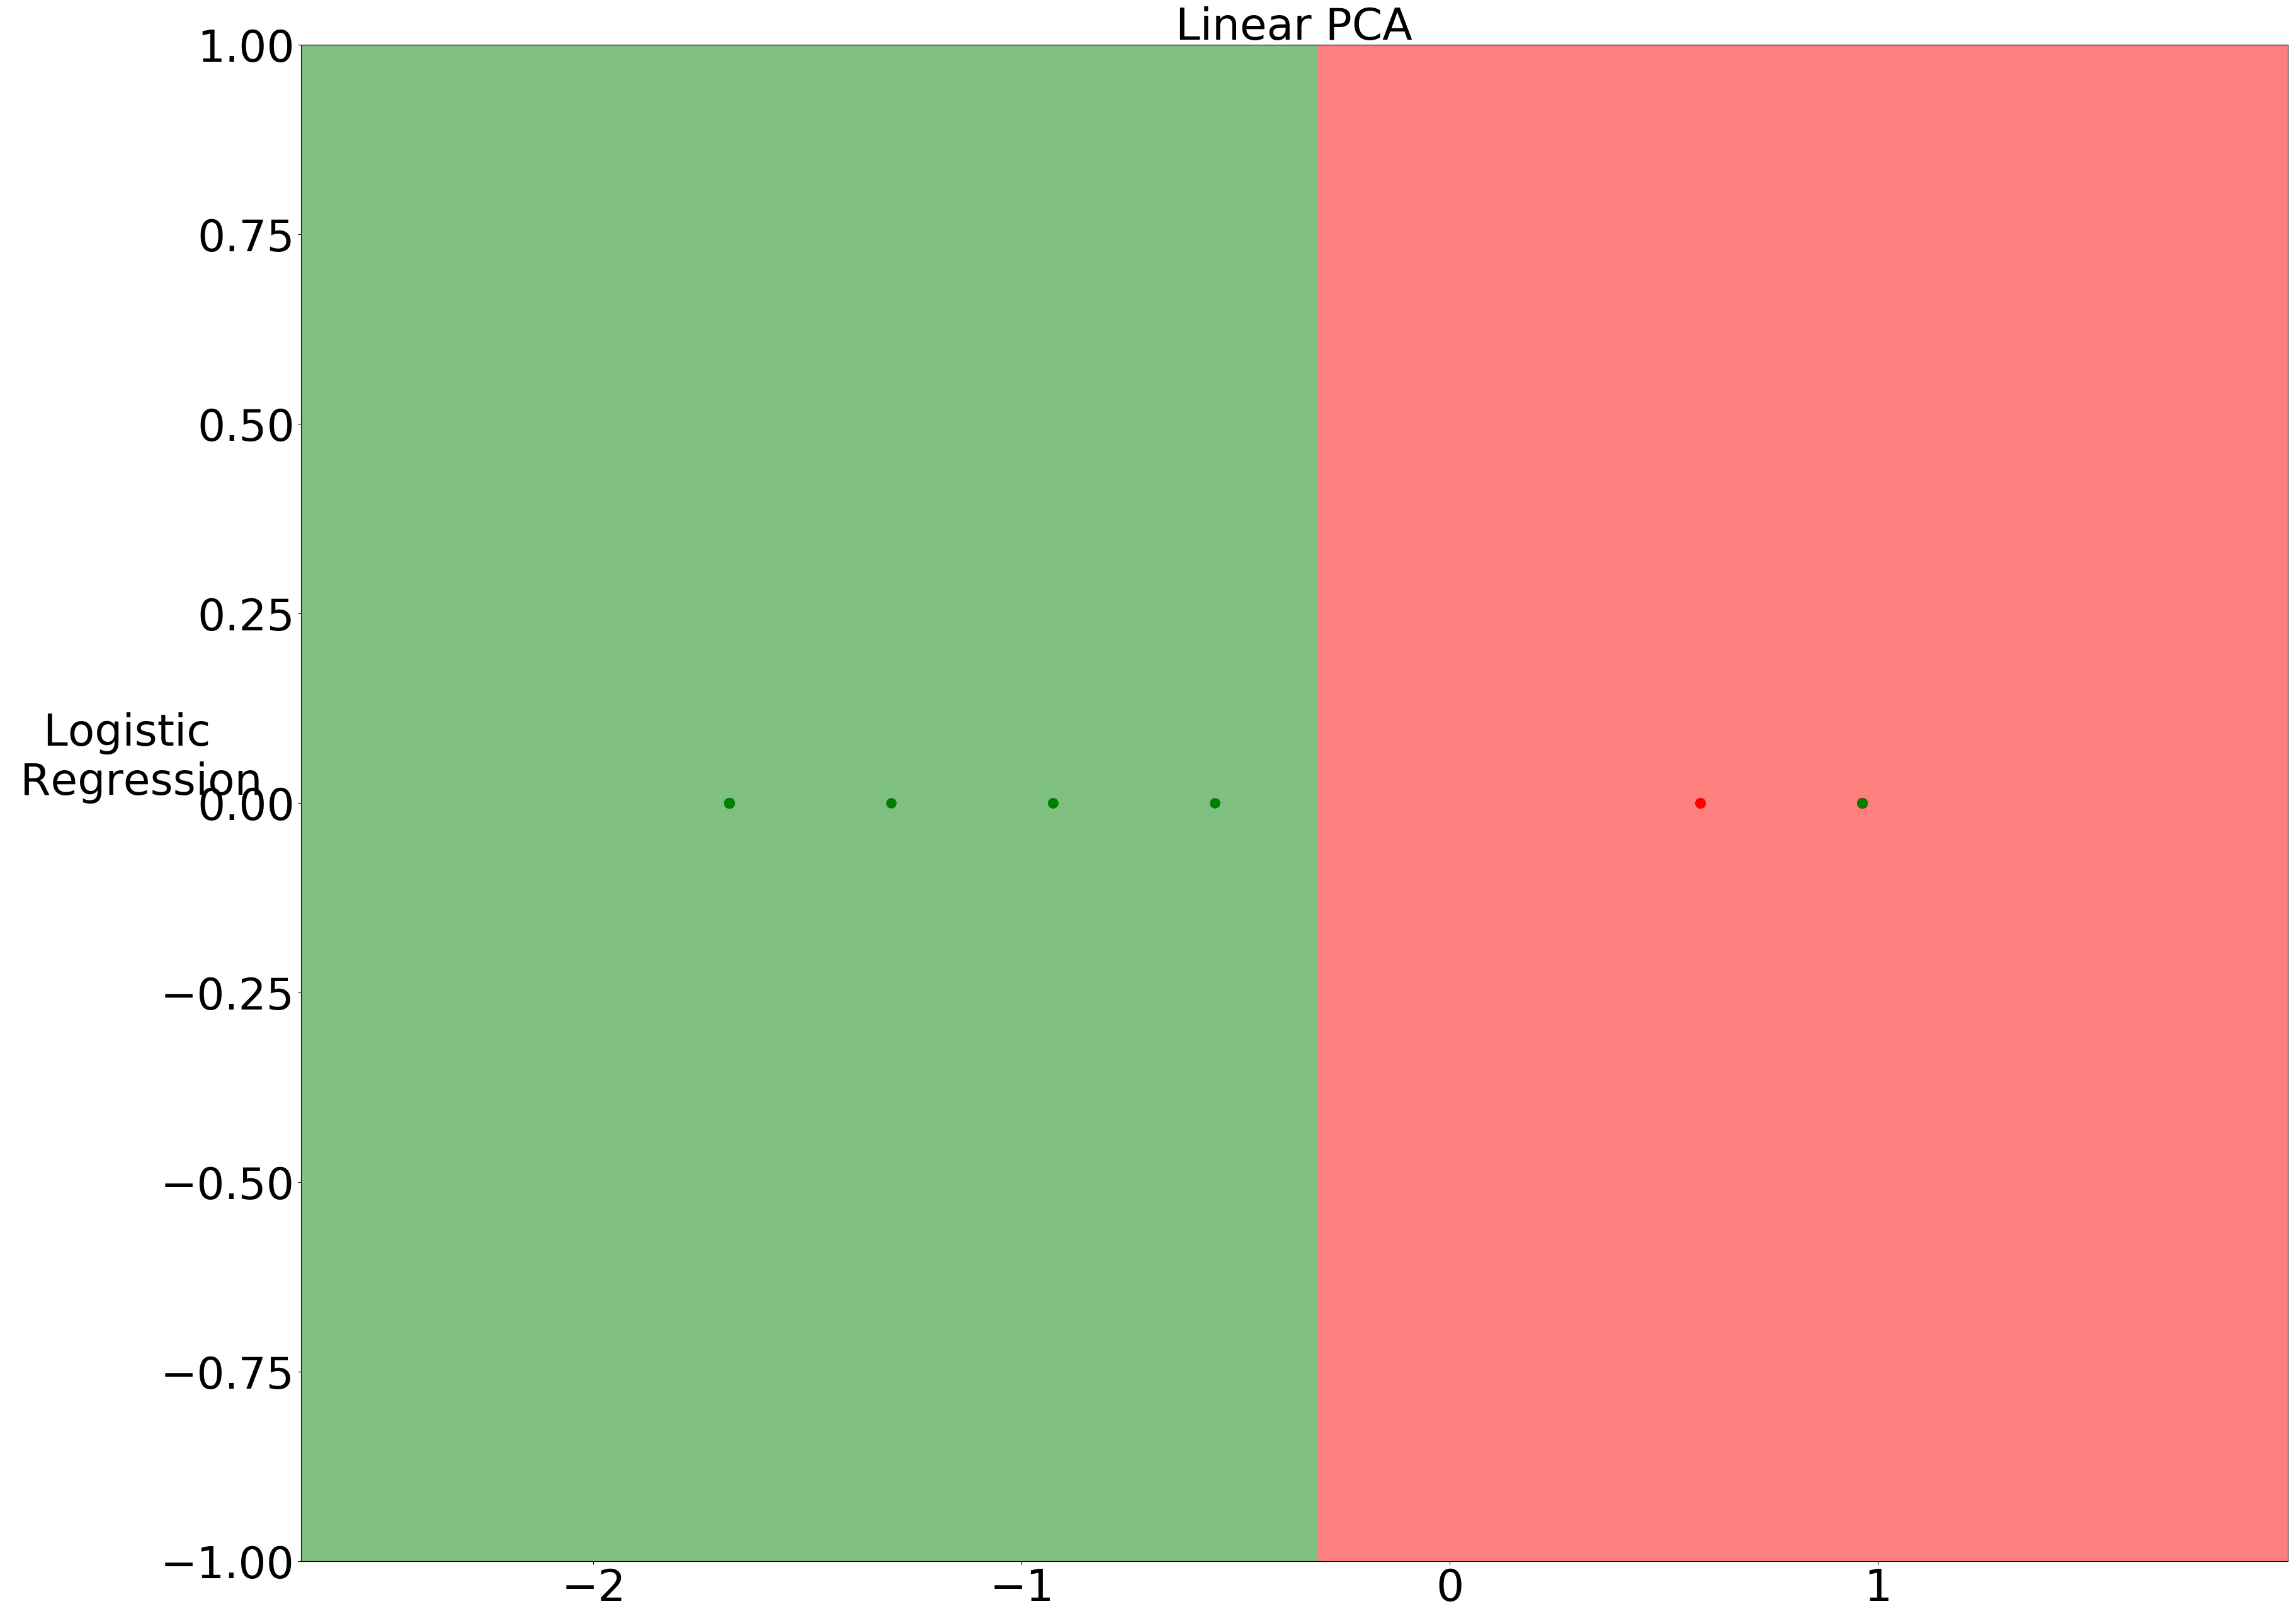

In [156]:
fig = plt.figure(figsize=(100,100),dpi=100)

#Logistic Regression   
from sklearn.linear_model import LogisticRegression
ax = plt.subplot(4,3,1)
ax.set_title('Linear PCA',fontsize=50)
ax.set_ylabel('Logistic \n Regression', rotation = 0, labelpad=30, fontsize = 50)
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")
fig.tight_layout()
plt.savefig('Logistic_linearPCA.jpg')
fig.show()

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_predlr1 = clf.fit(X_train, y_train).predict(X)
print(confusion_matrix(y_test,y_predlr))
#print(classification_report(y_test, y_pred))
print("Logistic regression ",accuracy_score(y_test,y_predlr))

# Boundary Line Plots

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

from sklearn.ensemble import ExtraTreesClassifier

In [159]:
data = pd.read_csv('../breast_cancer.csv',sep= ',')
data = data.drop('Unnamed: 32', axis=1)
x = data.iloc[:, 3:]

y = data.diagnosis
y = y.map({'M':1,'B':0})
scaler = StandardScaler()
x = scaler.fit_transform(x)


#Split data to get hold out test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)

In [160]:
def BoundaryLine(kernel, algo, algo_name):
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    print(x_train_reduced.shape)
    print(x_test_reduced.shape)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    print(X_set.shape)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j,s=120)
    #plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
    #plt.xlabel('Component 1')
    #plt.ylabel('Component 2')
    #plt.legend()
    plt.xticks(fontsize = 50)
    plt.yticks(fontsize = 50)

(455, 2)
(114, 2)
(569, 2)


c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 

(455, 2)
(114, 2)
(569, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(455, 2)
(114, 2)
(569, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


ValueError: Unknown kernel 'simoid'

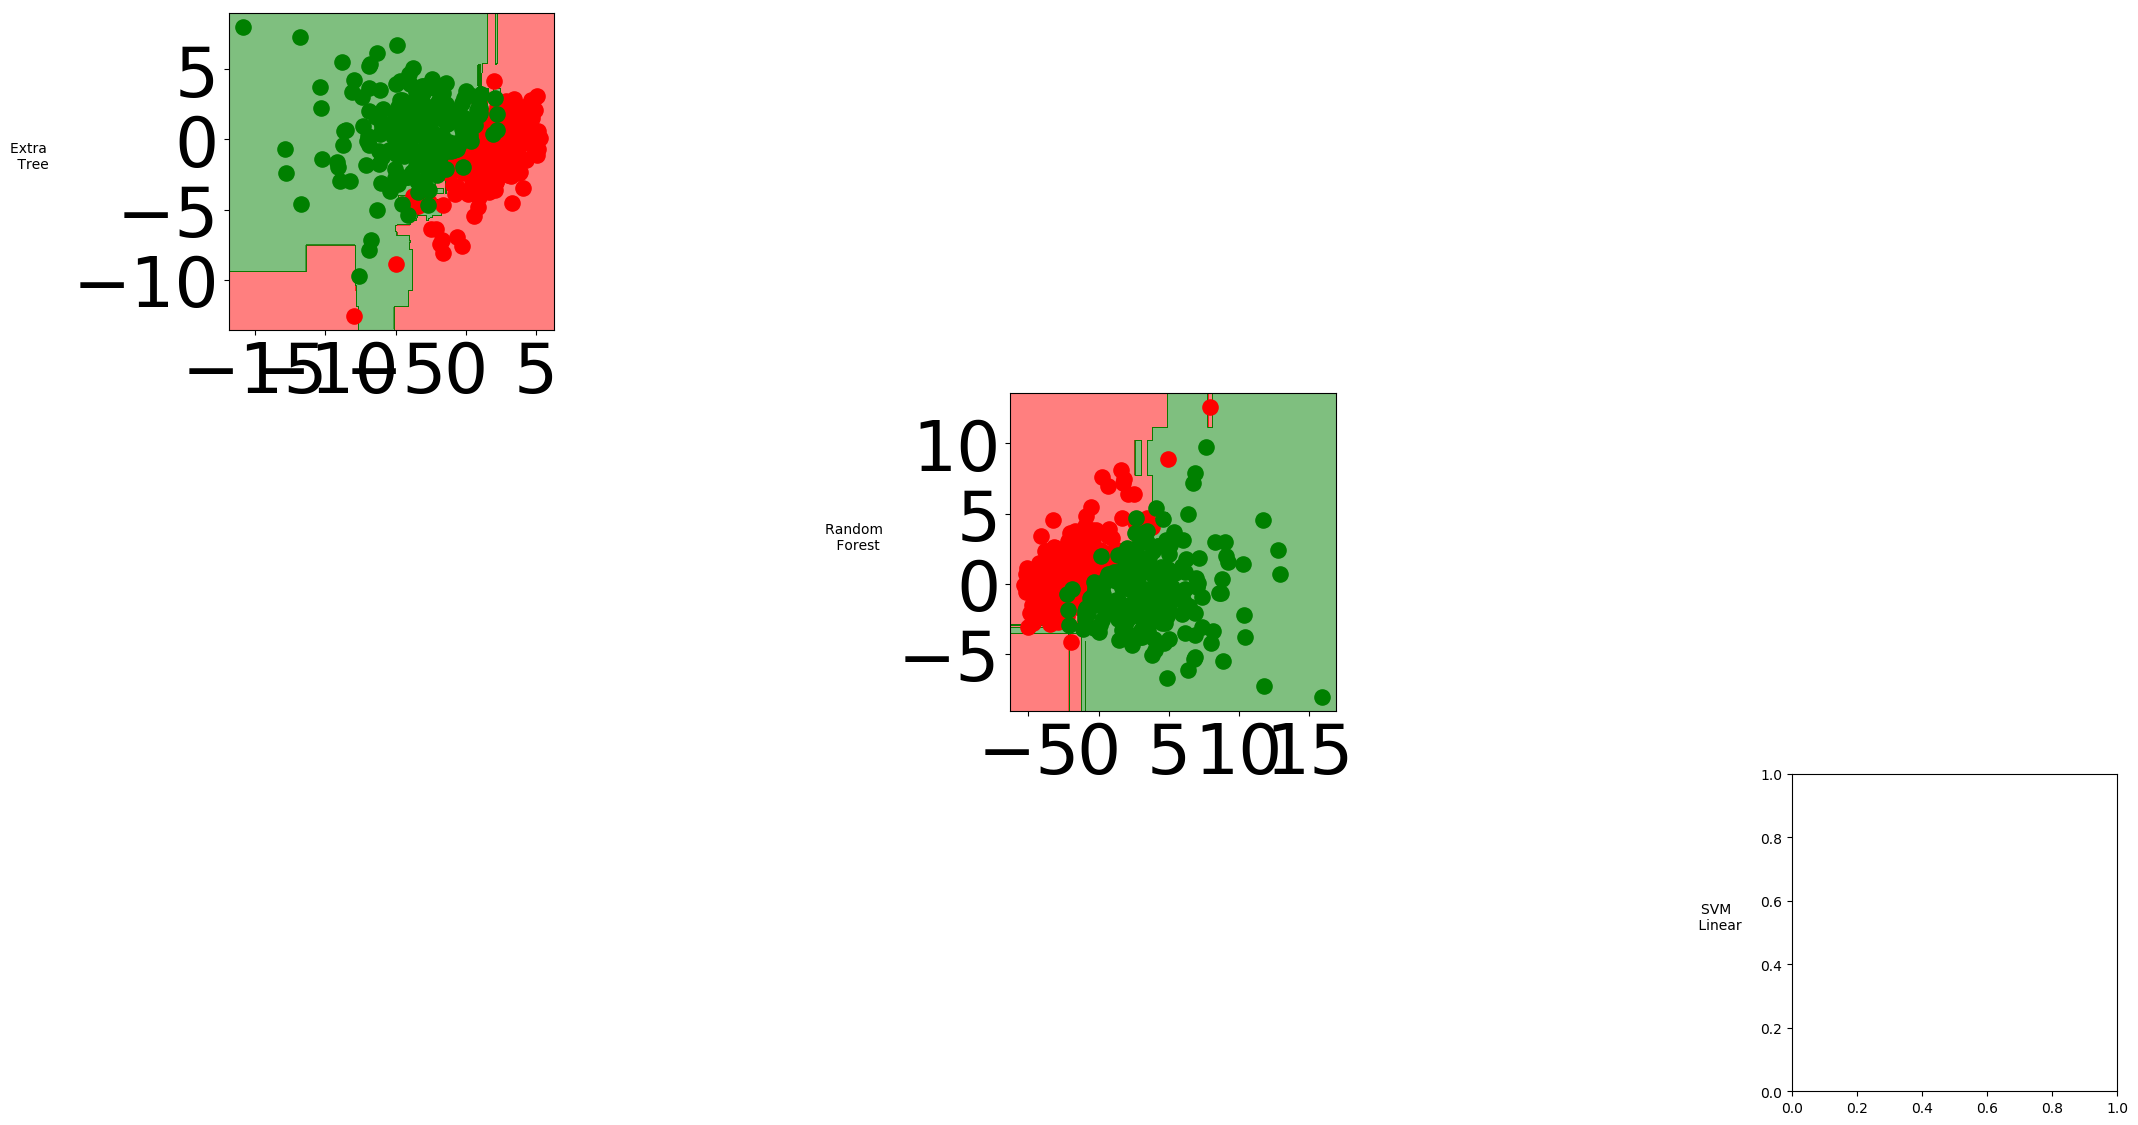

In [161]:
fig = plt.figure(figsize=(100,100),dpi=100)

#Logistic Regression   
from sklearn.linear_model import LogisticRegression
ax = plt.subplot(4,3,1)
ax.set_title('Linear PCA',fontsize=50)
ax.set_ylabel('Logistic \n Regression', rotation = 0, labelpad=30, fontsize = 50)
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")





#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
ax = plt.subplot(20,20,44)
ax.set_ylabel('Extra \n Tree', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', ExtraTreesClassifier(), "ExtraTree")

#Random Forest
from sklearn.ensemble import RandomForestClassifier
ax = plt.subplot(20,20,66)
ax.set_ylabel('Random \n Forest', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")

#Support Vector - linear
from sklearn.svm import SVC
ax = plt.subplot(20,20,88)
ax.set_ylabel('SVM \n Linear', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")

fig.tight_layout()
plt.savefig('Logistic_linearPCA.jpg')
fig.show()

(455, 2)
(114, 2)
(569, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


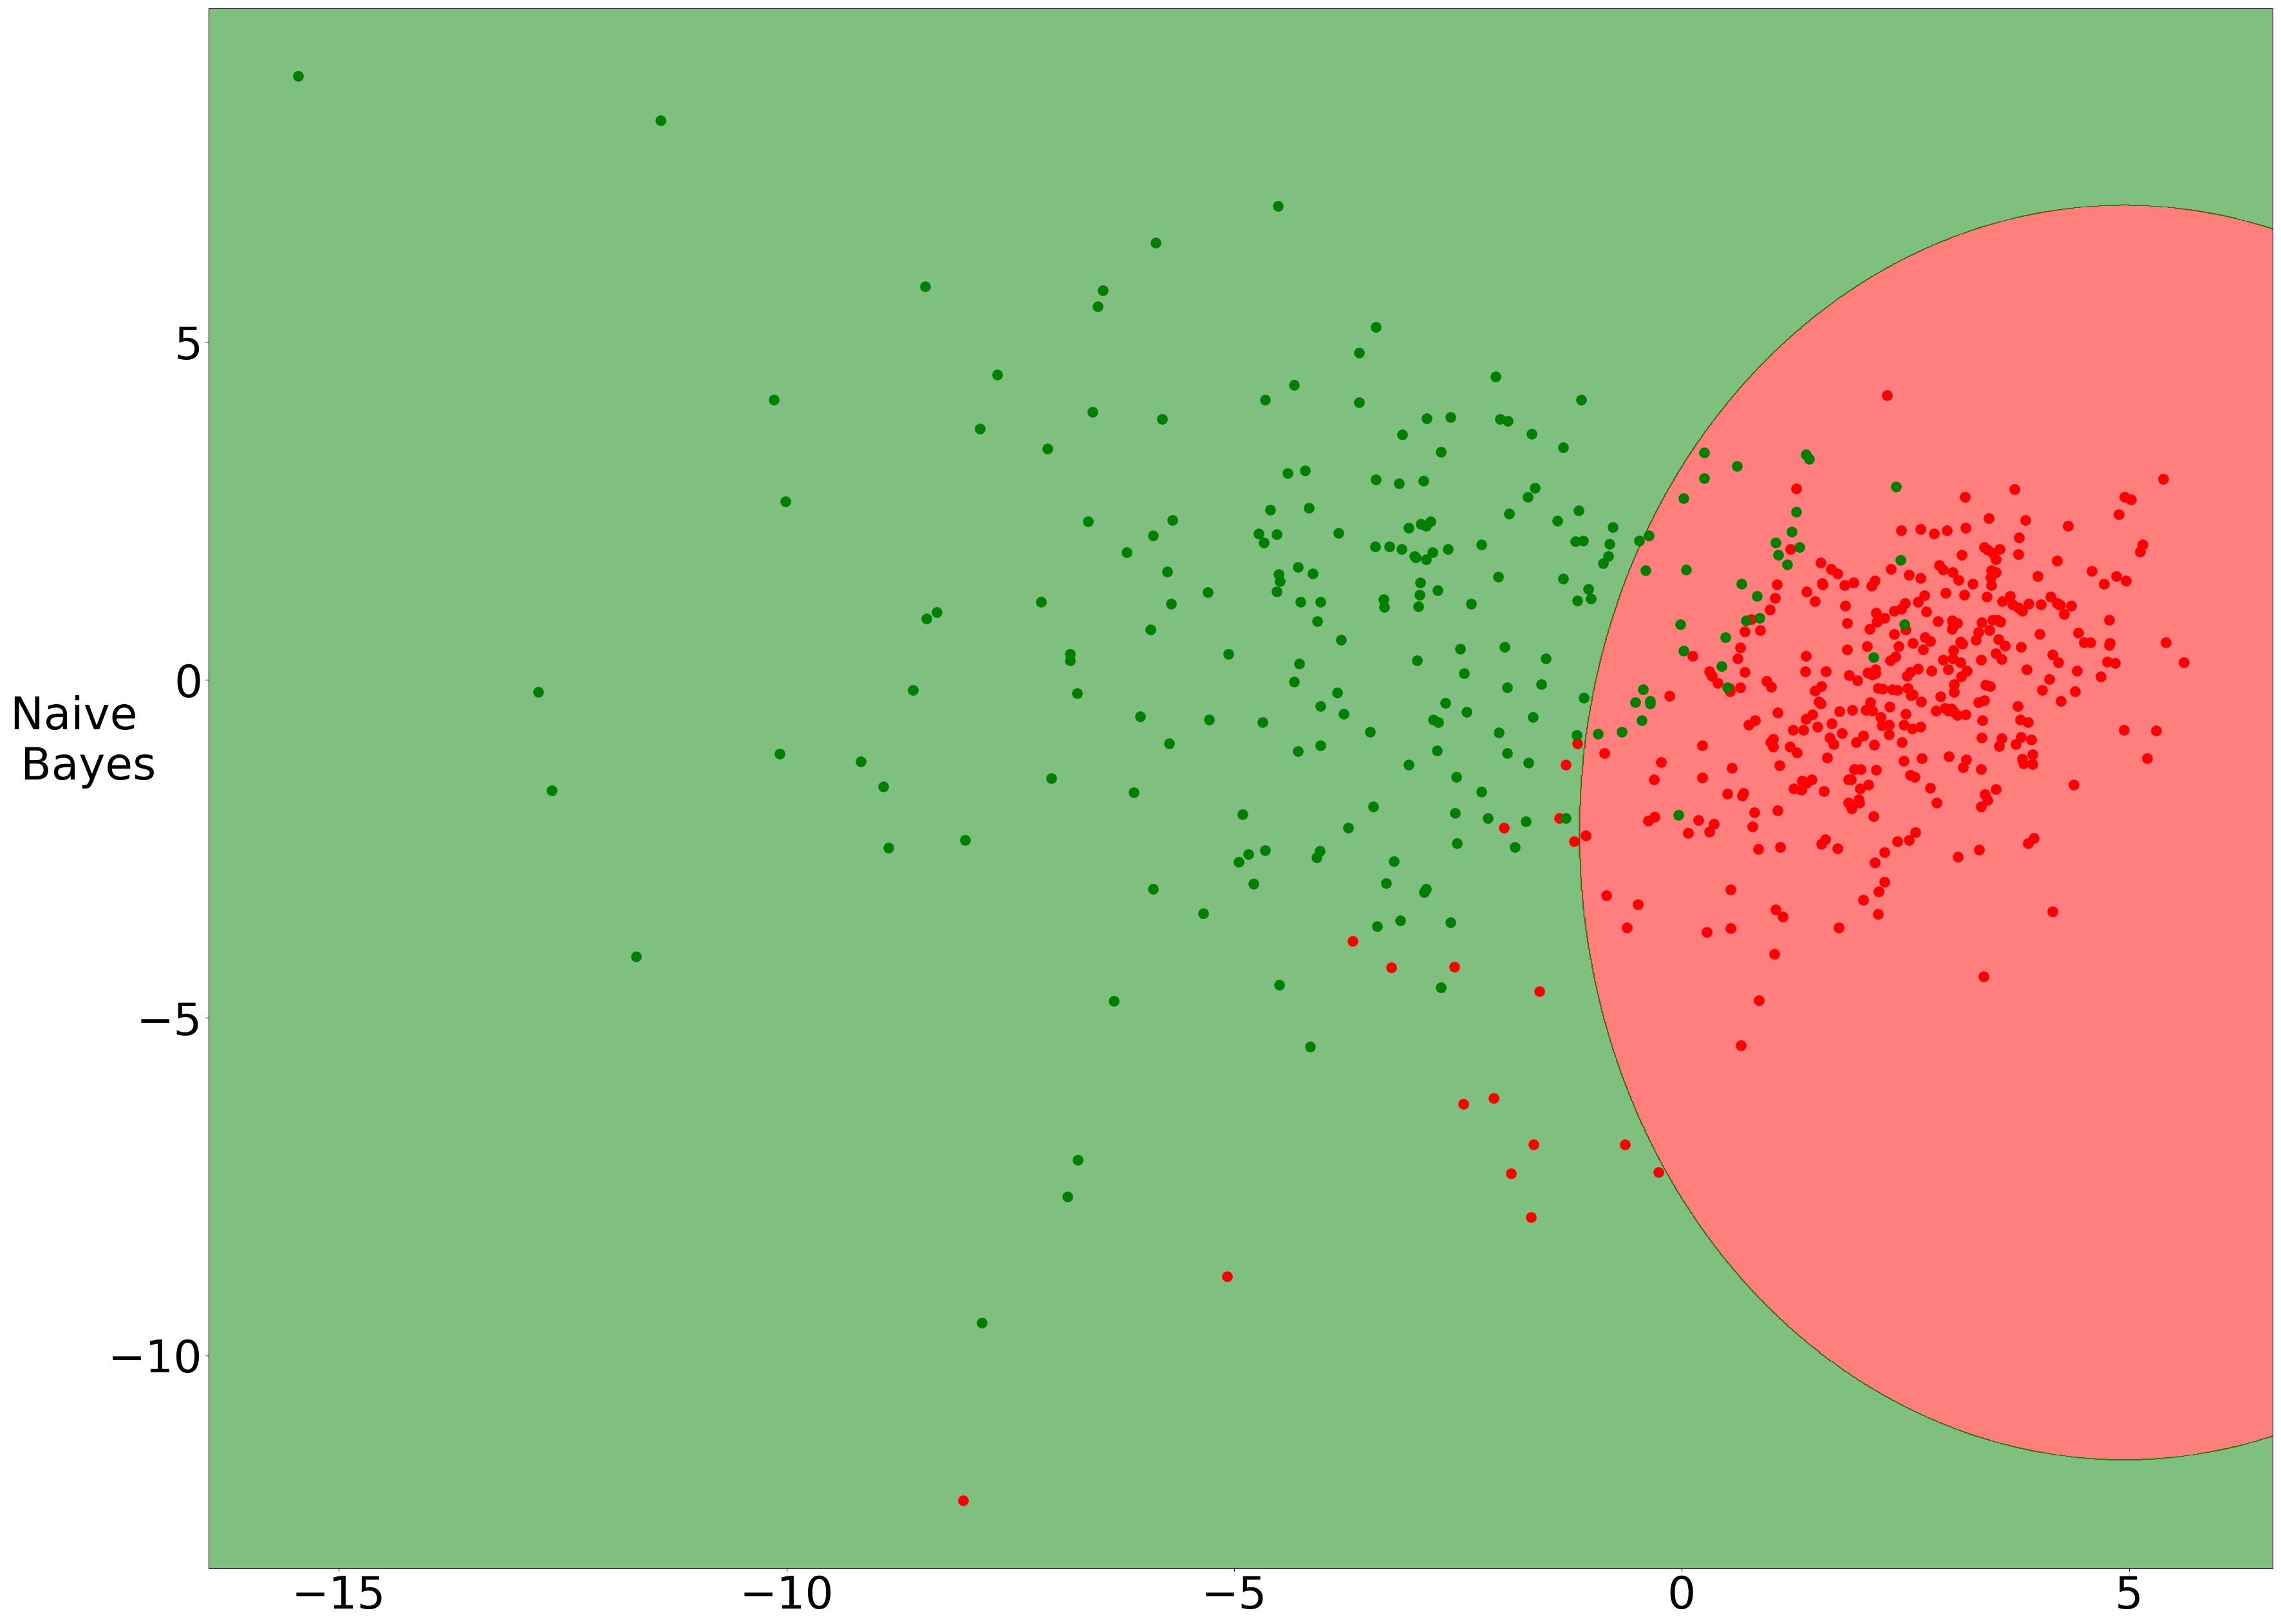

In [126]:
fig = plt.figure(figsize=(100,100),dpi=100)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
ax = plt.subplot(4,3,1)
ax.set_ylabel('Naive \n Bayes', rotation = 0, labelpad=30, fontsize = 50)
BoundaryLine('linear', GaussianNB(), "Naive Bayes")
fig.tight_layout()
plt.savefig('NB_linearPCA.jpg')
fig.show()

(455, 2)
(114, 2)
(569, 2)


c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
c:\users\rohit\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_

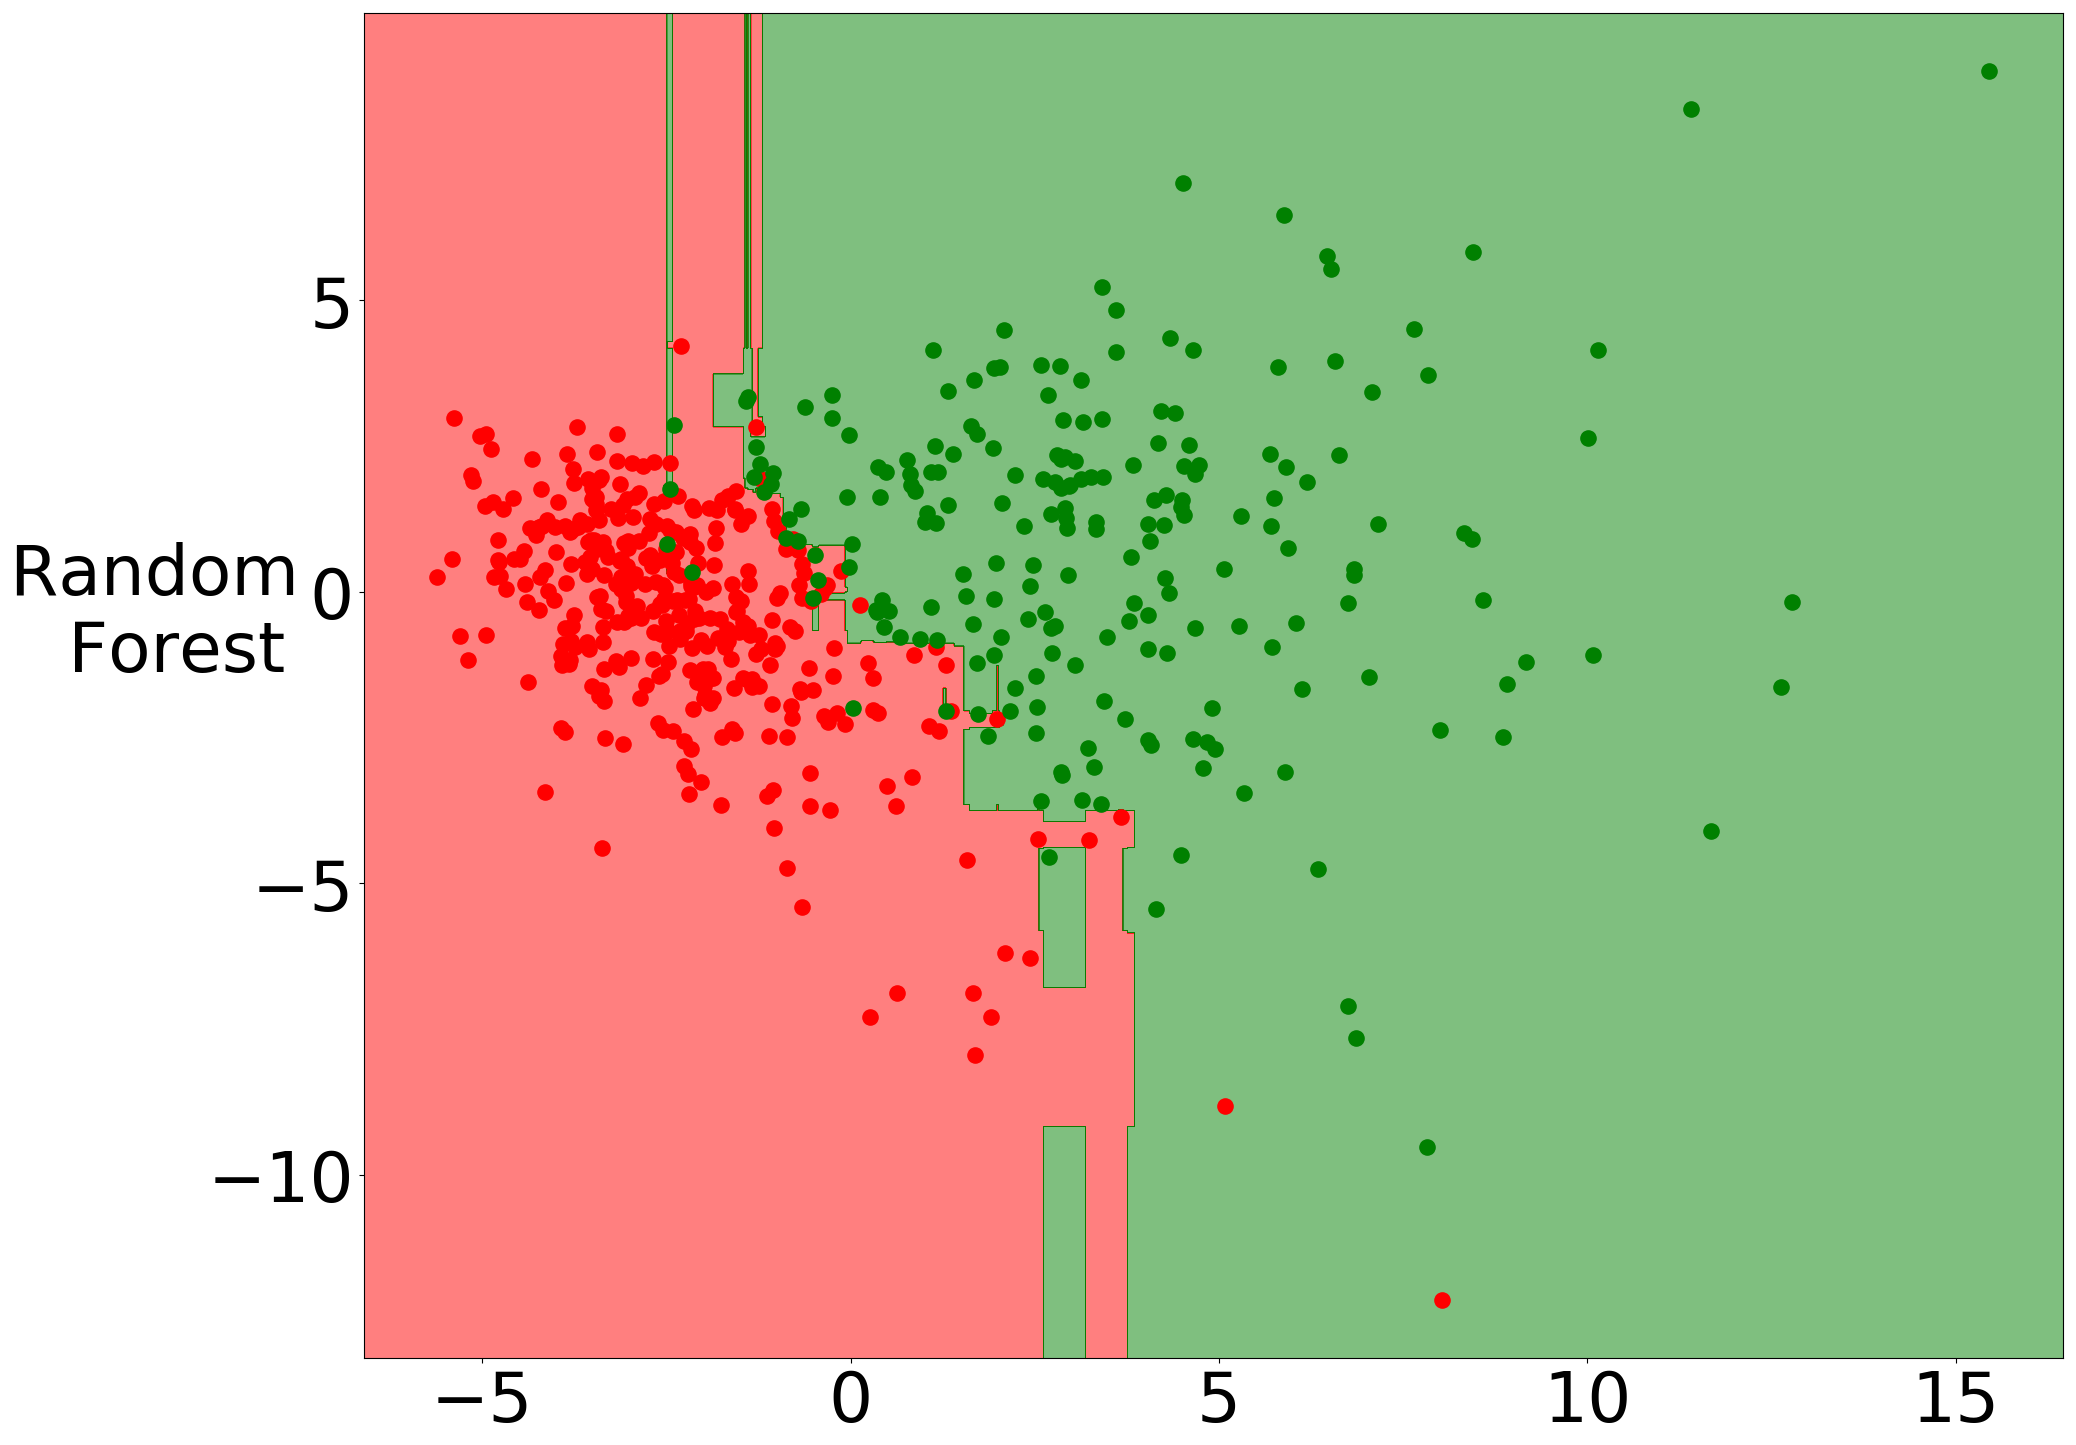

In [129]:
from sklearn.ensemble import RandomForestClassifier
fig = plt.figure(figsize=(100,100),dpi=100)
ax = plt.subplot(7,5,17)
ax.set_ylabel('Random \n Forest', rotation = 0, labelpad=30, fontsize = 50)
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")
fig.tight_layout()
plt.savefig('RF_linearPCA.jpg')
fig.show()

In [ ]:
from sklearn.svm import SVC
fig = plt.figure(figsize=(100,100),dpi=100)
ax = plt.subplot(7,5,21)
ax.set_ylabel('SVM \n Linear', rotation = 0, labelpad=30, fontsize = 50)
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")
fig.tight_layout()
plt.savefig('SVM_linearPCA.jpg')
fig.show()

In [51]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
#plt.xlabel('Component 1')
#plt.ylabel('Component 2')
#plt.legend()
plt.xticks(fontsize = 3)
plt.yticks(fontsize = 3)

TypeError: '(slice(None, None, None), 0)' is an invalid key